In [1]:
### Do the imports -- no need to change this
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sys
sys.path.insert(0, "src/")
from environment import GridWorldEnvironment
from MDPsolver import MDPsolver
from utils import *
from plot import *
%load_ext autoreload
%autoreload 2

***Before starting, we recall the use of the gridworld environment.***

The gridworld environment is instantiated via the class `GridWorldEnvironment`. 

***It takes 4 input values:***
- `reward_mode` : Integer between 0 and 3 for different reward profiles,
- `size`: Gridworld size,
- `prop`: Probability assigned to the event that the agent does not follow the chosen action but another one selected uniformely at random,
- `gamma`: Discount factor of the environment.

***Interface of a Gridworld instance:***
- `print(gridworld.n_states)` # return the number of states
- `print(gridworld.n_actions)` # return the number of actions
- `print(gridworld.r)` # return a matrix where each element indicates the reward corresponding to each (state, action) pair.
- `print(gridworld.gamma)` # return the discount factor
- `print(gridworld.sparseT[action])` # Input: action, Return: a matrix containing the state-to-state transition probabilities for the action passed as input.

<img src="../dynamic_programming/src/vis_gridworld.png" alt="fishy" class="bg-primary" width="400px">

# Ex 1: Prove of the Policy Gradient Theorem via the Performance Difference Lemma (20 points)

Denote $J(\pi) = \langle \mu, V^\pi \rangle$ and recall that the performance difference lemma states
$$
J(\pi) - J(\pi') = \frac{1}{1-\gamma}\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle]
$$
where $\lambda^{\pi'} \in \Delta_{\mathcal{S}\times\mathcal{A}}$ denotes the occupancy measure of the policy $\pi'$.

Now let us consider direct parametization, and compute a partial derivative for the entry of $\pi$ at index $(\bar{s},\bar{a})$:

$$
\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})}.
$$

**Questions**

To help you compute this partial derivative, consider the policies $\pi'$ parameterized by some (sufficiently small) $\delta \in \mathbb{R}$ via
$$
    \pi'(a|s) = \begin{cases}
        \pi(\bar{a}|\bar{s}) + \delta \quad (\text{if } (s,a)=(\bar{s},\bar{a}))\\
        \pi(a|s) \quad (\text{else})
    \end{cases}
$$

(1) Argue that
$$
\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} =\lim_{\delta \rightarrow 0} \frac{\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle]}{\pi(\bar{a}|\bar{s}) - \pi'(\bar{a}|\bar{s})}.
$$

**Answer**

For any differentiable function $f$ of a vector $x \in \mathbb{R}^d$, its partial derivative with respect to an entry $x_i$ is defined as follows:
$$
\frac{\partial f(x)}{\partial x_i} = \lim_{h \to 0 } \frac{f(x + he_i) - f(x)}{h}
$$

Here, it is as if $i = (\bar{s}, \bar{a})$: if we interpret a policy as a $|\mathcal{S}|\times|\mathcal{A}|$-dimensional vector, then:
 - $\pi' = \pi + \delta e_{\bar{s}, \bar{a}}$,
 - $J(\pi') - J(\pi) = J(\pi + \delta e_{\bar{s}, \bar{a}}) - J(\pi)$

Then we can compte the partial derivative:

$$\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \lim_{\delta \to 0} \frac{J(\pi + \delta e_{\bar{s}, \bar{a}}) - J(\pi)}{\delta}$$

$$
\quad = \lim_{\delta \to 0} \frac{J(\pi') - J(\pi)}{\delta} = \lim_{\delta \to 0} \frac{J(\pi) - J(\pi')}{-\delta} 
$$
Using the performance difference lemma:
$$
\quad = \lim_{\delta \to 0} \frac{1}{1-\gamma} \frac{\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle]}{-\delta}
$$

Using that $-\delta = \pi(\bar{a}|\bar{s})-\pi'(\bar{a}|\bar{s})$, we can conclude:

$$
\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \lim_{\delta \to 0} \frac{1}{1-\gamma} \frac{\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle]}{\pi(\bar{a}|\bar{s})-\pi'(\bar{a}|\bar{s})}
$$

---

(2) Argue that $$\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \lim_{\delta \rightarrow 0} \lambda^{\pi'}(\bar{s}) Q^\pi(\bar{s}, \bar{a}).$$

Hint: Write the expectation in the previous question as a sum and use the fact that $\frac{\pi(a|s) - \pi'(a|s)}{\pi(\bar{a}|\bar{s}) - \pi'(\bar{a}|\bar{s})} = \mathbf{1}_{\{ (\bar{s},\bar{a}) = (s,a) \}}$.

**Answer**

Let $\delta >0$. Let's write the following expectation as a sum
$$
\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle] = \sum_{s\in \mathcal{S}} \lambda^{\pi'}(s)\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle
$$

Then, we can develop the inner product:

$$
\quad = \sum_{s\in \mathcal{S}}  \sum_{a \in \mathcal{A}} \lambda^{\pi'}(s) (\pi(a|s) - \pi'(a| s) ) Q^\pi(s, a)
$$

Reminding that $\pi(a|s) - \pi'(a| s) = - \delta \mathbf{1}_{\{(\bar{s}, \bar{a}) = (s,a) \}}$, we can simplify the double sum:
$$
\quad = - \delta \lambda^{\pi'}(\bar{s})  Q^\pi(\bar{s}, \bar{a})
$$

Then
$$
\frac{\mathbb{E}_{s \sim \lambda^{\pi'}}[\langle\pi(\cdot|s) - \pi'(\cdot| s) , Q^\pi(s, \cdot) \rangle]}{\pi(\bar{a}|\bar{s})-\pi'(\bar{a}|\bar{s})} = \frac{- \delta \lambda^{\pi'}(\bar{s})  Q^\pi(\bar{s}, \bar{a})}{ - \delta} = \lambda^{\pi'}(\bar{s})  Q^\pi(\bar{s}, \bar{a})
$$

Using what we have found in the previous question, we can conclude:
$$
\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \lim_{\delta \to 0} \frac{1}{1-\gamma} \lambda^{\pi'}(\bar{s})  Q^\pi(\bar{s}, \bar{a})
$$

---

(3) Conclude that $$\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \lambda^{\pi}(\bar{s}) Q^\pi(\bar{s}, \bar{a})$$
for the direct parameterization. 

**Answer**

We can directly conclude, using that $\lim_{\delta \to 0} \lambda ^{\pi'}(\bar{s}) = \lambda^\pi(\bar{s})$ (since $\lim_{\delta \to 0} \pi' = \pi$):
$$
\frac{\partial J(\pi)}{\partial \pi(\bar{a}|\bar{s})} = \frac{1}{1-\gamma} \lambda^{\pi}(\bar{s})  Q^\pi(\bar{s}, \bar{a})
$$

---

(4) Prove that for a general parametrization, it holds that
$$
\nabla_\theta J(\pi_\theta) = \sum_{\bar{s},\bar{a}} \lambda^{\pi}(\bar{s}, \bar{a}) Q^\pi(\bar{s}, \bar{a}) \nabla_{\theta} ( \log \pi_\theta(\bar{a}|\bar{s}))
$$

Hint: Use the chain rule to write $$ \nabla_\theta J(\pi_\theta)  = \sum_{\bar{s},\bar{a}} \frac{\partial J(\pi)}{\partial \pi_\theta(\bar{a}|\bar{s})} \nabla_{\theta} \pi_\theta(\bar{a}|\bar{s}), $$
and then use the fact that $\lambda^{\pi}(\bar{s},\bar{a}) = \lambda^{\pi}(\bar{s}) \pi(\bar{a}|\bar{s})$.

**Answer**

The chain rule gives:
$$
\nabla_\theta J(\pi_\theta)  = \sum_{\bar{s},\bar{a}} \frac{\partial J(\pi)}{\partial \pi_\theta(\bar{a}|\bar{s})} \nabla_{\theta} \pi_\theta(\bar{a}|\bar{s})
$$

 - We can express the gradient of the policy as a function of the score function $\nabla _\theta (\log \pi_\theta (\bar{a}|\bar{s}))$:
$$
\nabla _\theta \pi_\theta (\bar{a}|\bar{s}) = \pi_\theta (\bar{a}|\bar{s}) \nabla _\theta (\log \pi_\theta (\bar{a}|\bar{s}))
$$

Combining this with the result of the previous question, we get:
$$
\nabla_\theta J(\pi_\theta)  = \sum_{\bar{s},\bar{a}} \frac{1}{1-\gamma} \lambda^{\pi}(\bar{s})  Q^\pi(\bar{s}, \bar{a}) \pi_\theta (\bar{a}|\bar{s}) \nabla _\theta (\log \pi_\theta (\bar{a}|\bar{s}))
$$

 - Besides, $\forall s,a \in \mathcal{S}\times \mathcal{A} $,

$$
\lambda^\pi(s,a) = \sum_{t=0}^{+\infty} \gamma^t \mathbb{P}(s_t,a_t = s,a | \pi, s_0 \sim \mu)
$$
Noting $\mathbb{P}(\cdots | \pi, s_0 \sim \mu) := \mathbb{P}_{\pi,\mu}(\cdots)$
$$
\quad = \sum_{t=0}^{+\infty} \gamma^t \mathbb{P}_{\pi, \mu}(s_t = s) \mathbb{P}_{\pi, \mu}(a_t = a | s_t =s)
$$
By definition of the policy:
$$
\quad = \sum_{t=0}^{+\infty} \gamma^t \mathbb{P}_{\pi, \mu}(s_t = s) \pi( a | s)
$$

$$
\quad = \pi( a | s) \sum_{t=0}^{+\infty} \gamma^t \mathbb{P}_{\pi, \mu}(s_t = s)
$$
Thus,
$$
\lambda^\pi(s,a) = \pi( a | s) \lambda^\pi(s) \quad \forall s,a \in \mathcal{S}\times \mathcal{A}
$$

 - We can then conclude:

$$
\nabla_\theta J(\pi_\theta)  = \sum_{\bar{s},\bar{a}} \frac{1}{1-\gamma} \lambda^{\pi}(\bar{s}, \bar{a})  Q^\pi(\bar{s}, \bar{a})  \nabla _\theta (\log \pi_\theta (\bar{a}|\bar{s}))
$$

# Ex 2: Natural Policy Gradient with softmax parameterization (20 points)

Recall that the iterates $\{\pi^t\}^{\infty}_{t=1}$ produced by NPG read as follows:
$$
\pi^{t+1}(a|s) = \frac{\pi^t(a|s)e^{\eta Q^{\pi^t}(s,a) }}{\sum_{a'} \pi^t(a'|s) e^{\eta Q^{\pi^t}(s,a')}}.
$$

**Question** 

Implement NPG for an arbitrary step size $\eta$.

In [9]:
def evaluate_policy(pi, env, tol=1e-10):
    """Implementation of policy evaluation through iteratively applying using a certain policy 
    Args:
        pi: a policy stochastic passed with shape n_states times n_actions
        env: environment
        tol: a scalar to dermerminate whether the policy evaluation convergences
    Returns:
        v: an array with the values of the actions chosen
        q: an array with the q values    
    """
    v = np.zeros(env.n_states)
    q = np.zeros((env.n_states, env.n_actions))
    while True:
        v_old = np.copy(v)
        for a in range(env.n_actions):
            q[:, a] = env.r[:, a] + env.gamma * env.sparseT[a].dot(v)
        for s in range(env.n_states):
            v[s] = q[s].dot(pi[s])
        if np.linalg.norm(v - v_old) < tol:
            break
    return v, q

def npg_update(q, eta, old_policy):
    """Implementation of a greedy approach to choose policies (policy improvement)
    Args:
        q: q values obtained from evaluating the policies
    Returns:
        new_policy: the updates policy
    """
    policy = np.zeros_like(q)
    for s in range(q.shape[0]):
        log_policy = np.zeros_like(old_policy[s])
        log_policy = np.log(old_policy[s]) + eta*q[s]  #using log to avoid overflow
        if np.max(log_policy)>= 50:
            log_policy -= np.max(log_policy)
        policy[s,:] = np.exp(log_policy) +1e-10 # TODO (unnormalized update)
        policy[s,:] /= np.sum(policy[s,:]) # TODO: normalize
    return policy

def get_greedy_policy(q):
    """Implementation of a greedy approach to choose policies (policy improvement)
    Args:
        q: q values obtained from evaluating the policies
    Returns:
        policy: greedy policy (list)
    """
    policy = np.zeros_like(q)
    for s in range(q.shape[0]):
        policy[s,np.argmax(q[s,:])] = 1
    return policy

In [10]:
def NPG(env, eta): # apply NPG iterations for 30 steps
    vs = []
    policies = []
    v = np.zeros(env.n_states)
    q = np.zeros((env.n_states, env.n_actions))
    pi = np.ones_like(q)/env.n_actions
    for k in range(30):
        v_old = np.copy(v)
        v, q = evaluate_policy(pi, env)
        if eta < np.inf:
            pi = npg_update(q, eta, pi)
        else:
            pi = get_greedy_policy(q)
        vs.append(v)
        policies.append(pi)
    return vs, policies

Now, we run NPG for different stepsizes in the usual gridworld environment

In [11]:
reward_mode = 2
size = 10 
prop = 0
gamma=0.99
gridworld = GridWorldEnvironment(reward_mode, size, prop=0, gamma=gamma)
mu = np.ones(gridworld.n_states)/gridworld.n_states
etas = [1e-3, 1e-2, 1e-1, 1, 100, 1e7, np.inf]
#etas = [1e-3, 1e-2, 1e-1,  np.inf]   #modified because eta = 1, 100, 1e7 would take too long
v_different_etas = []
pi_different_etas = []
for eta in etas:
    print('eta:',eta)
    values_pi, policies = NPG(gridworld, eta=eta)
    v_different_etas.append(values_pi)
    pi_different_etas.append(policies)

eta: 0.001
eta: 0.01
eta: 0.1
eta: 1
eta: 100
eta: 10000000.0
eta: inf


In [12]:
solver = MDPsolver(gridworld)
solver.value_iteration()

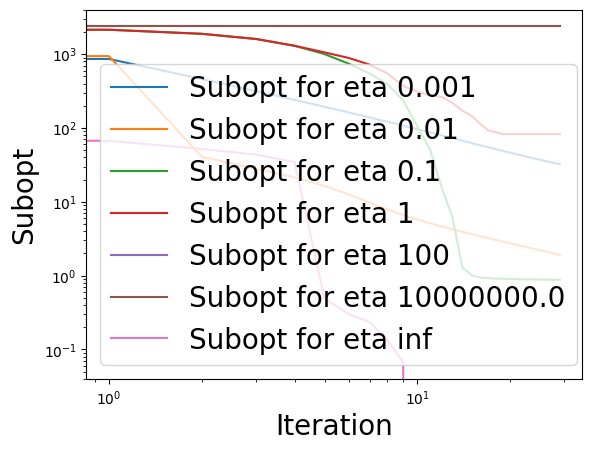

In [13]:
# TODO: if this plot appears with a too large legend, rerun this line once more
plot_log_lines([np.array([mu.dot(solver.v - v) for v in v_different_etas[i]]) for i, _ in enumerate(etas)], [f"Subopt for eta {eta}" for eta in etas], ["Iteration", "Subopt"], "figs", "NPG.pdf", show = True)

**Question**

Show that NPG with $\eta = \infty$ coincides with Policy Iteration (PI).

More formally: Assuming that $a^\star_s := \mathrm{argmax}_a Q^{\pi^t}(s,a)$ is unique for all $s$, prove that $$ \lim_{\eta \rightarrow \infty} \frac{\pi^t(a|s)e^{\eta Q^{\pi^t}(s,a) }}{\sum_{a'} \pi^t(a'|s) e^{\eta Q^{\pi^t}(s,a')}} = \begin{cases} 1 \quad \text{if} \quad a = a^\star_s \\ 0 \quad \text{otherwise} \end{cases},$$
and explain how this relates to PI.

**Answer**

Let's assume that $a^\star_s := \mathrm{argmax}_a Q^{\pi^t}(s,a)$ is unique, and $\pi^t (a^\star_s|s)>0$.

Then for $\eta \to \infty$, we can find the following equivalent:
$$
\frac{\pi^t(a|s)e^{\eta Q^{\pi^t}(s,a) }}{\sum_{a'} \pi^t(a'|s) e^{\eta Q^{\pi^t}(s,a')}} \sim \frac{\pi^t(a|s)e^{\eta Q^{\pi^t}(s,a) }}{ \pi^t(a^\star_s|s) e^{\eta Q^{\pi^t}(s,a^\star_s)}}
$$
$$
\rightarrow 0 \; \text{if} \; a \neq a^\star_s
$$
$$
\rightarrow 1 \; \text{if} \; a = a^\star_s
$$

So NPG with $\eta = \infty$ can be expressed as follows:
$$
\pi^{t+1}_{NPG( \eta = \infty)}(a|s) = \mathbf{1}_{\{ a \; = \; \mathrm{argmax}_{a'} Q^{\pi^t}(s,a')  \}}
$$

But PI, in the deterministic policy framework, is defined as follows:
$$
\pi^{t+1}_{PI}(s) = \mathrm{argmax}_{a'} Q^{\pi^t}(s,a')
$$
Which is equivalent to NPG with $\eta = \infty$.

---

**Question**

Is this observation in line with the empirical results in the plot above? I.e., is the plot for $\eta = \infty$ as you would expect it for PI?

**Answer**

The empirical results are in line with the result proved above: for $\eta = \infty$, we get the exact solution in less than 10 iterations, which is the same order of magnitude as when we implemented PI in the first notebook.

# Ex 2.1 Slow Changing Property of NPG

In this exercise you will investigate by how much consecutive iterates $\pi^t$ and $\pi^{t+1}$ produced by NPG differ and how this distance is controlled by the step size $\eta$.

Plot $$\max_{s \in \mathcal{S}} || \pi^{t+1}(a|s) - \pi^t(a|s) ||_1$$ for different values of $\eta$.

In [14]:
def compute_policy_variation(policies):
    variation = []
    for pi, pip in zip(policies[1:], policies[:-1]):
        variation.append(np.max([ np.sum(np.abs(pi[s,:] - pip[s,:])) for s in range(pi.shape[0])])) # TODO
    return variation

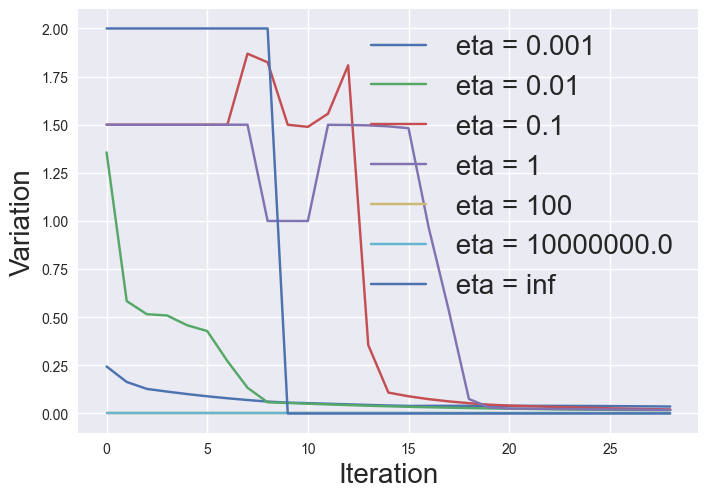

In [15]:
plot_lines(np.array([ compute_policy_variation(np.array(pi_different_etas)[i])
                           for i, _ in enumerate(etas)]), 
               [f" eta = {eta}" for eta in etas], 
               ["Iteration", "Variation"], "figs", "NPG.pdf", show = True)

**Question**

Empirically, is the largest change (among all iterations) between consecutive iterations is larger for smaller or large values of $\eta$?

>**Answer:**

Before convergence, the largest change between consecutive iterations is larger for large values of $\eta$. It makes sense, since in the limit $\eta = 0$, $\pi^{t+1} = \pi^t$, and because $\eta$ can be interpreted like a learning rate in gradient descent.

---

## Some Theory to Motivate the Observation Above

**Question**

Our goal is to prove that $$ || \pi^{t+1}(\cdot|s) - \pi^t(\cdot|s) ||_1 \leq \frac{\eta}{1 - \gamma} \quad \forall s \in \mathcal{S}, \forall t \in [T].$$

We guide you towards this result by breaking the proof into small steps.

1) Prove that $$ \frac{1}{2} || \pi^{t+1}(s) - \pi^t(s) ||^2_1 \leq \mathbb{E}_{a \sim \pi^{t+1}(\cdot|s)}[\eta Q^{\pi^t}(s,a)] - \log \bigg(\sum_{a'\in\mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\bigg) $$

Hint: First apply Pinkser's inequality https://en.wikipedia.org/wiki/Pinsker%27s_inequality to prove that $$\frac{1}{2} || \pi^{t+1}(s) - \pi^t(s) ||^2_1 \leq KL(\pi^{t+1}(s)||\pi^t(s)), $$ then plug in the formula for $\pi^{t+1}$ into the KL term.

**Answer**

 - **Pinsker's inequality can be applied as follows:**
$$
\| \pi^{t+1}(s) - \pi^t(s)  \|_1 \leq \sqrt{2 KL (\pi^{t+1}(s) || \pi^t(s))}
$$

Which is equivalent to:
$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq KL (\pi^{t+1}(s) || \pi^t(s))
$$

 - **Let's compute the $KL$ term:**
$$
KL (\pi^{t+1}(s) || \pi^t(s)) = \sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \log \frac{\pi^{t+1}(a|s)}{\pi^{t}(a|s)}
$$
$$
\quad = \sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \log \frac{\exp (\eta Q^{\pi^t}(s,a))}{\sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))}
$$

$$
\quad = \sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \eta Q^{\pi^t}(s,a) \; - \; \sum_{a\in \mathcal{A}} \pi^{t+1}(a|s)\log \left[ \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right]
$$
We recognize the first term as an expected value, and we see that the second term can be reorganized as follows:
$\sum_{a\in \mathcal{A}} \pi^{t+1}(a|s)\log \left[ \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right]\; =\; \log \left[ \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right] \cdot \left[\sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \right]$

$\quad = \log \left[ \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right]
$

Then

$$
KL (\pi^{t+1}(s) || \pi^t(s)) = \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] - \log \left( \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right)
$$

 - **We can conclude with the desired inequality:**
$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] - \log \left( \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right)
$$

---

2) Prove that 
$$
\sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \exp(- \eta Q^{\pi^t}(s,a)) = \frac{1}{\sum_{a'\in \mathcal{A}} \pi^t(a|s) \exp(\eta Q^{\pi^t}(s,a) )}.
$$

**Answer**

Let's plug in the formula for $\pi^{t+1}$:
$$
\sum_{a\in \mathcal{A}} \pi^{t+1}(a|s) \exp(- \eta Q^{\pi^t}(s,a)) =\sum_{a\in \mathcal{A}} \frac{\pi^t(a|s)\exp(\eta Q^{\pi^t}(s,a))}{\sum_{a'\in \mathcal{A}}\pi^t(a'|s)\exp(\eta Q^{\pi^t}(s,a'))} \exp(- \eta Q^{\pi^t}(s,a))
$$

$$
\quad =\sum_{a\in \mathcal{A}} \frac{\pi^t(a|s)}{\sum_{a'\in \mathcal{A}}\pi^t(a'|s)\exp(\eta Q^{\pi^t}(s,a'))} 
$$

$$
\quad =\frac{1}{\sum_{a'\in \mathcal{A}}\pi^t(a'|s)\exp(\eta Q^{\pi^t}(s,a'))} \sum_{a\in \mathcal{A}} \pi^t(a|s)
$$

$$
\quad =\frac{1}{\sum_{a'\in \mathcal{A}}\pi^t(a'|s)\exp(\eta Q^{\pi^t}(s,a'))}
$$
Which is the desired result

---

3) Using the results in 1) and 2) prove that 

$$ \frac{1}{2} || \pi^{t+1}(s) - \pi^t(s) ||^2_1 \leq \mathbb{E}_{a \sim \pi^{t+1}(\cdot|s)}[\eta Q^{\pi^t}(s,a)] + \log \bigg(\sum_{a'\in\mathcal{A}} \pi^{t+1}(a'|s) \exp (-\eta Q^{\pi^t}(s,a'))\bigg). $$

**Answer**

From 1), we have:
$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] - \log \left( \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))\right)
$$

$$
\quad \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] + \log \frac{1}{ \sum_{a' \in \mathcal{A}} \pi^t(a'|s) \exp (\eta Q^{\pi^t}(s,a'))}
$$
We can use the result from 2) and conclude:

$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] + \log \left( \sum_{a'\in \mathcal{A}} \pi^{t+1}(a'|s) \exp(- \eta Q^{\pi^t}(s,a')) \right)
$$

---

4) Using Hoeffding's Lemma https://en.wikipedia.org/wiki/Hoeffding%27s_lemma (on the sum in the log term!) and the fact that $$-\frac{1}{1-\gamma} \leq Q^{\pi^t}(s,a) \leq \frac{1}{1-\gamma},$$ conclude that 
$$\frac{1}{2} || \pi^{t+1}(s) - \pi^t(s) ||^2_1 \leq \frac{\eta^2}{2 (1 - \gamma)^2}.$$

 - **The sum in the log term can be written as an expected value:**
$$
\sum_{a'\in \mathcal{A}} \pi^{t+1}(a'|s) \exp(- \eta Q^{\pi^t}(s,a')) = \mathbb{E}_{a' \sim \pi^{t+1}(s)} \left[ \exp(-\eta Q^{\pi^t(s,a')})   \right]
$$

Noticing that
$$
-\frac{1}{1-\gamma} \leq Q^{\pi^t}(s,a) \leq \frac{1}{1-\gamma},
$$

We can apply Hoeffding's lemma:
$$
\mathbb{E}_{a' \sim \pi^{t+1}(s)} \left[ \exp(-\eta Q^{\pi^t(s,a')})   \right] \leq \exp \left(  \mathbb{E}_{a' \sim \pi^{t+1}(s)} \left[ -\eta Q^{\pi^t(s,a')} \right ]  + \frac{ (2\eta)^2}{8(1-\gamma)^2}  \right)
$$
Since $\log$ is an increasing function, we can apply it to the inequality:
$$
\log \left(\sum_{a'\in \mathcal{A}} \pi^{t+1}(a'|s) \exp(- \eta Q^{\pi^t}(s,a'))   \right) \leq  - \mathbb{E}_{a' \sim \pi^{t+1}(s)} \left[ \eta Q^{\pi^t(s,a')} \right ]  + \frac{ \eta^2}{2(1-\gamma)^2}  
$$

 - **We can use this in the inequality of the previous question:**
$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] + \log \left( \sum_{a'\in \mathcal{A}} \pi^{t+1}(a'|s) \exp(- \eta Q^{\pi^t}(s,a')) \right)
$$

$$
\quad \leq \mathbb{E}_{a\sim \pi^{t+1}(s)}\left[\eta Q^{\pi^t}(s,a) \right] - \mathbb{E}_{a \sim \pi^{t+1}(s)} \left[ \eta Q^{\pi^t(s,a)} \right ]  + \frac{ \eta^2}{2(1-\gamma)^2}  
$$
 - **Since the expected values cancel each other, we get the desired result:**
$$
\frac{1}{2}\| \pi^{t+1}(s) - \pi^t(s)  \|_1^2 \leq  \frac{ \eta^2}{2(1-\gamma)^2}  
$$

Which is equivalent to:
$$
\| \pi^{t+1}(s) - \pi^t(s)  \|_1 \leq  \frac{ \eta}{1-\gamma}  
$$
Thus showing why larger values of $\eta$ allow for larger change between two consecutive policies in NPG.

---

# Ex 3: OPPO: The importance of Exploration in Policy Gradient (20 points)

In this exercise, we will investigate how crucial it is to perform exploration. That is, adding bonuses to avoid suffering the mismatch coefficients in the convergence bounds.

Let us recall that the standard sample based version of NPG suffers the mismatch coeffcients in the bounds (see Slide 22 in Lecture 5). Those are avoided by OPPO ( See slide 30 in Lecture 5 ).

**To see clearly the advatange of OPPO we will consider an MDP with unbounded mismatch coefficients**

**Question: example of unbounded mismatch coefficients**

Consider a 10 x 10 gridworld, the initial state is always the bottom right corner, i.e. the initial distribution $\mu$ equals $1$ at this starting state and it is zero everywhere else. Can you compute a finite bound for 
$$\max_\pi \max_{s \in \mathcal{S}} \bigg |\frac{\lambda^\pi(s)}{\mu(s)} \bigg|,$$
i.e. the mismatch coefficient? If not, argue for which reason.

**Answer**



Let's call $s_0$ the bottom right corner. Then $\mu(s) = \mathbf{1}_{\{s=s_0\}}$.

Then for any $s' \neq s_0$, and any $\pi \in \Pi$ such that $\lambda^\pi(s') > 0$ (for instance, a policy that always tries to reach $s'$),

We have:

$$
\left | \frac{\lambda^\pi(s')}{\mu (s')} \right | = + \infty
$$

Thus:
$$\max_\pi \max_{s \in \mathcal{S}} \bigg |\frac{\lambda^\pi(s)}{\mu(s)} \bigg| = + \infty$$

This shows that we get unbounded mismatch coefficients if the initial distribution $\mu$ is null for some states.

In the following, we experiment with OPPO with and without bonuses in this environment.

In [9]:
reward_mode = 0
size = 10
gamma=0.999
gridworld = GridWorldEnvironment(reward_mode, size, prop=0, gamma=gamma)
r_max = np.max(gridworld.r)
r_min = np.min(gridworld.r)
gridworld.r = (gridworld.r - r_min) / (r_max - r_min)

In [16]:
from copy import deepcopy
def oppo(K: int = 10000, H: int = 20, beta: float = 0.0001, eta=10000) -> List[float]:
    """
    Function implementing OPPO with UCB bonuses algorithm.

    :param K: Number of episodes, positive int
    :param H: Number of steps per episode, positive int
    :param beta: Algorithm hyperparameter, constant which scales the bonuses, positive float

    :return: reward after each step, list of K * H floats
    """

    # Initialize tabular records
    rewards = []
    Q = H * np.ones((H, gridworld.n_states, gridworld.n_actions))
    V = H * np.ones((H + 1, gridworld.n_states))
    policy = np.ones((H, gridworld.n_states, gridworld.n_actions), dtype=float)/gridworld.n_actions
    V[H, :] = 0
    estimated_transitions = np.ones((H, gridworld.n_states, 
                                     gridworld.n_actions, 
                                     gridworld.n_states))/gridworld.n_states
    N = np.zeros((H, gridworld.n_states, gridworld.n_actions))
    bonus = np.zeros((H, gridworld.n_states, gridworld.n_actions))
    N_next = np.zeros((H, gridworld.n_states, gridworld.n_actions, gridworld.n_states))

    for k in range(K):  # Episode loop
        print(k, "k")
        state = 99  # Initial state
        for h in range(H):
            #NPG Update
            log_policy = np.zeros_like(policy[h,state,:])
            log_policy = np.log(policy[h,state,:]) + eta * Q[h,state,:]
            if np.max(log_policy) >= 10:
                log_policy -= np.max(log_policy)
            policy[h, state, :] = np.exp(log_policy) + 1e-10 # TODO (unnormalized) 
            policy[h, state, :] /= np.sum(policy[h, state, :]) # TODO: normalize
            
            
            if np.isnan(policy[h,state,:]).any(): #debug
                print(policy[h,state, :])
                print(log_policy)


            # Sample one action the current policy
            a = np.random.choice(gridworld.n_actions, p=policy[h, state, :]) # TODO
            rewards.append(gridworld.r[state, a])

            # Record that we visited this state-action pair (again)
            N[h, state, a] += 1 # TODO

            # Get the new state according to the transition dynamics
            new_state = np.random.choice(gridworld.n_states,
                                         p=gridworld.T[a][state])
            N_next[h, state, a, new_state] += 1 # TODO
            
            estimated_transitions[h,state,a,:] = N_next[h,state, a,:]/(1+N[h,state,a]) # TODO
            

            # Calculate the UCB bonus
            state = new_state
        
        bonus = beta * np.sqrt(H**3/ (N+1)) #Should be of dimension H x Sx A
        Q_new = np.zeros_like(Q)
        V_new = np.zeros_like(V)
        for h in reversed(range(H)):  # Step loop
            # Update Q according to the algorithm
            if h<H-1:
                for s in range(gridworld.n_states):
                    for a in range(gridworld.n_actions):
                        reshaped_P_h_s_a = np.zeros_like(policy[h+1,:,:])
                        for new_s in range(gridworld.n_states):
                            reshaped_P_h_s_a[new_s,:] = estimated_transitions[h,s,a,new_s]
                        Q_new[h,s,a] = np.clip(gridworld.r[s,a] + bonus[h,s,a] + np.sum(reshaped_P_h_s_a * policy[h+1,:,:] * Q_new[h+1, :,:]), 0, H-h+1)# TODO

            # Update V as the Q-value of the optimal actions for the current state
            for state in range(gridworld.n_states):
                V_new[h, state] = np.max(Q_new[h,state,:]) # TODO
        Q = deepcopy(Q_new)
        V = deepcopy(V_new)
    return rewards

In [21]:
to_plot = []
betas = [0,1e-5, 1e-4, 1e-3, 1e-1]

for beta in betas:
    reward_OPPO = oppo(beta = beta, eta=0.1, K=1000)  # You can play around with the arguments if you like
    to_plot.append(np.cumsum(reward_OPPO))

0 k
1 k
2 k
3 k
4 k
5 k
6 k
7 k
8 k
9 k
10 k
11 k
12 k
13 k
14 k
15 k
16 k
17 k
18 k
19 k
20 k
21 k
22 k
23 k
24 k
25 k
26 k
27 k
28 k
29 k
30 k
31 k
32 k
33 k
34 k
35 k
36 k
37 k
38 k
39 k
40 k
41 k
42 k
43 k
44 k
45 k
46 k
47 k
48 k
49 k
50 k
51 k
52 k
53 k
54 k
55 k
56 k
57 k
58 k
59 k
60 k
61 k
62 k
63 k
64 k
65 k
66 k
67 k
68 k
69 k
70 k
71 k
72 k
73 k
74 k
75 k
76 k
77 k
78 k
79 k
80 k
81 k
82 k
83 k
84 k
85 k
86 k
87 k
88 k
89 k
90 k
91 k
92 k
93 k
94 k
95 k
96 k
97 k
98 k
99 k
100 k
101 k
102 k
103 k
104 k
105 k
106 k
107 k
108 k
109 k
110 k
111 k
112 k
113 k
114 k
115 k
116 k
117 k
118 k
119 k
120 k
121 k
122 k
123 k
124 k
125 k
126 k
127 k
128 k
129 k
130 k
131 k
132 k
133 k
134 k
135 k
136 k
137 k
138 k
139 k
140 k
141 k
142 k
143 k
144 k
145 k
146 k
147 k
148 k
149 k
150 k
151 k
152 k
153 k
154 k
155 k
156 k
157 k
158 k
159 k
160 k
161 k
162 k
163 k
164 k
165 k
166 k
167 k
168 k
169 k
170 k
171 k
172 k
173 k
174 k
175 k
176 k
177 k
178 k
179 k
180 k
181 k
182 k
183 k
184 k


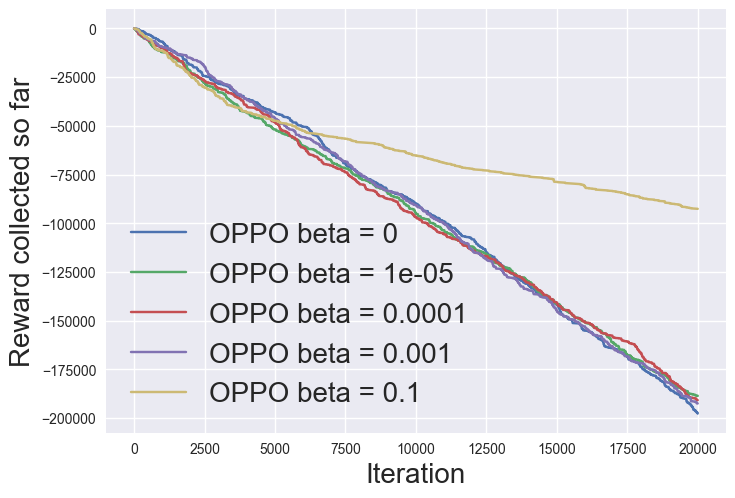

In [23]:
labels = [ f"OPPO beta = {beta}" for beta in betas]
plot_lines(
    to_plot,
    labels,
    ["Iteration", "Reward collected so far"],
    "figs",
    "ucbvseps",
    show=True
)

**Question**

Why does setting $\beta = 0$ lead to bad results? 

*Hint: Explain using the remarks in slide 28 and the theoretical bound in Slide 22 of Lecture 5*.

**Answer**

In slide 22 of Lecture 5, we see that for the convergence of sample-based NPG (without bonuses, i.e. with $\beta = 0$), the upper bound has a term in $\sqrt{\kappa \epsilon_{\text{stat}}}$, which is unbounded in this case, thus convergence is not guaranteed.

In slide 28, a sufficient condition for optimism and bounded optimism is the following inequality:
$$
\left| \sum_{s' \in \mathcal{S}} (\hat{P}_h(s'|s,a) - P_h(s'|s,a))V(s') \right| \leq \text{bonus}_h(s,a)
$$
However, if $\beta =0$, then the bonus is always zero, and the inequality is false in practice, thus we cannot guarantee neither optimism nor bounded optimism.

More generally, having no bonuses prevents from exploring all state-action pairs, potentially avoiding optimal rewards.

**Question**

Why does setting $\beta$ too large lead to poor results?

*Hint: Answer using the regret bound for OPPO given at the beginning of slide 30.*

**Answer**

The regret bound for OPPO is as follows:
$$
\sum_{t=1}^T V^\star (s_1) - V^{\pi^t}(s_1) \leq \mathcal{O}\left( \sum_{h=1}^H \sum_{t=1}^T \text{bonus}_h^t (s_h^t, a_h^t)  \right)
$$
But since $\text{bonus}_h^t (s_h^t, a_h^t) = \frac{\beta}{\sqrt{N_h^t(s_h^t, a_h^t)}}$, then the regret bound is proportionnal to $\beta$. As a consequence, setting $\beta$ too large may increase the regret. It makes sense because having very large bonuses may lead to excessive exploration.

# Ex 4: REINFORCE with parametrized policies (20 points)

In this exercise, we will investigate the effect of choosing different baselines in the reinforce implementation.
This topic is covered from Slide 31 on in Lecture 5.

**Hint: You may want to use Google Colab to run the experiments faster, but you don't have to.**

### Import the Necessary Packages

In [24]:
# TODO: you may need to run this to make sure to have the correct versions
!pip install gym==0.25.2
!pip install gym-notices==0.0.8

     ---------------------------------------- 0.0/734.5 kB ? eta -:--:--
     ------------------------------------- 734.5/734.5 kB 14.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.25.2-py3-none-any.whl size=852414 sha256=c50b7c2325ba8b411f4792dca41f5246c33f8c22df1534bc4643fd0367ca4ad8
  Stored in directory: c:\users\noé\appdata\local\pip\cache\wheels\e6\45\45\4e6c047a424cfc385198309d6c6f32c39866f256f25d4048bf
Successfully built gym


In [25]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
torch.manual_seed(0)

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### Instantiate the Environment and Agent

The CartPole environment is very simple. It has discrete action space (2) and 4 dimensional state space.

In [27]:
env = gym.make('CartPole-v0')
env.seed(0)

c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function

[0]

In [28]:
class Policy(nn.Module): # definie the policy network
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        return F.softmax(x, dim=1) # we just consider 1 dimensional probability of action

    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        model = Categorical(probs)
        action = model.sample()
        return action.item(), model.log_prob(action)
    

In [29]:
# REINFORCE (with reward-to-go)
# --> with gradient estimator according to version 2 of the PG theorem (not using Q-values, but reward to go)
def reinforce_rwd2go(policy, optimizer, early_stop=False, n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for e in range(1, n_episodes):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        # Collect trajectory
        for t in range(max_t):
            # Sample the action from current policy
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        # Calculate total expected reward
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        # Recalculate the total reward applying discounted factor
        discounts = [gamma ** i for i in range(len(rewards) + 1)]
        rewards_to_go = [sum([discounts[j]*rewards[j+t] for j in range(len(rewards)-t) ]) for t in range(len(rewards))]

        # Calculate the loss
        policy_loss = []
        for i in range(len(saved_log_probs)):
            log_prob = saved_log_probs[i]
            G = rewards_to_go[i]
            # Note that we are using Gradient Ascent, not Descent. So we need to calculate it with negative rewards.
            policy_loss.append(-log_prob * G)
        # After that, we concatenate whole policy loss in 0th dimension
        policy_loss = torch.cat(policy_loss).sum()

        # Backpropagation
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if e % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_deque)))
        if early_stop and np.mean(scores_deque) >= 195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e - 100, np.mean(scores_deque)))
            break
    return scores

**Question**

1. Find **two** good baselines that improve over the implementation of REINFORCE without baseline. You should plot their results below.

You can take inspiration from the Example Notebook we attached for lecture 4, but you **cannot use exactly the same**.

2. Explain why you chose your baselines and why you think they are reasonable.

*Note:* You may also change other parameters such as the learning rate, as long as you clearly state it in your response.

**Answer**

 - The first baseline is negatively correlated with the absolute value of the pole angle, and of the angular velocity. Using an absolute value penalizes more the small deviations from zero compared to using the square of the angle (in the naive baseline).
 - The second baseline is similar to the first one but penalizes the cart positions away from zero instead of the angular velocity (to avoid episode termination because of the cart exceeding the limits).

Looking at the plots below, the second baseline seems to perform better than the first one and REINFORCE without baseline: penalizing cart deviations is apparently more beneficial than penalizing angular velocity.

In [57]:
def naive_baseline(state): # Example Baseline from lecture 4 (for inspiration)
  angle = state[2]
  value = 100*(0.25-angle**2) # TO BE CHANGED USING YOUR BASELINE
  return value

def baseline_1(state): # TO BE CHANGED USING YOUR BASELINE 1
  cart_position = state[0]   # TODO
  cart_velocity = state[1]
  angle = state[2]
  angular_velocity = state[3]

  value = - 10*np.abs(angle/0.2) - 0.5*np.abs(angular_velocity)

  return value # TODO

def baseline_2(state): # TO BE CHANGED USING YOUR BASELINE 2
  cart_position = state[0]   # TODO
  cart_velocity = state[1]
  angle = state[2]
  angular_velocity = state[3]

  value = - 10*np.abs(angle/0.2) - 0.5*np.abs(cart_position/2)
  return value # TODO

# PLOT 3: reward-to-go with baseline REINFORCE
# --> with gradient estimator according to version 3 of the PG theorem (not using Q-values, but reward to go)
# --> here, we consider only fixed (handcrafted) baseline functions b : S -> R; clearly, training a NN to predict V^{\pi}(s) as a baseline is also possible (and interesting!)
def reinforce_rwd2go_baseline(policy, optimizer, early_stop=False, baseline=naive_baseline, n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for e in range(1, n_episodes):
        saved_log_probs = []
        rewards = []
        baseline_values = []
        state = env.reset()
        # Collect trajectory
        for t in range(max_t):
            # Sample the action from current policy
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            baseline_values.append(baseline(state))
            if done:
                break
        # Calculate total expected reward
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        # Recalculate the total reward applying discounted factor
        discounts = [gamma ** i for i in range(len(rewards) + 1)]
        rewards_to_go = [sum([discounts[j]*rewards[j+t] for j in range(len(rewards)-t) ]) for t in range(len(rewards))]

        # Calculate the loss
        policy_loss = []
        for i in range(len(saved_log_probs)):
            log_prob = saved_log_probs[i]
            G_centered = rewards_to_go[i] - baseline_values[i]
            # Note that we are using Gradient Ascent, not Descent. So we need to calculate it with negative rewards.
            policy_loss.append(-log_prob * G_centered)
        # After that, we concatenate whole policy loss in 0th dimension
        policy_loss = torch.cat(policy_loss).sum()

        # Backpropagation
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if e % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_deque)))
        if early_stop and np.mean(scores_deque) >= 195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e - 100, np.mean(scores_deque)))
            break
    return scores

In [58]:
env = gym.make('CartPole-v0')
env.seed(0)

# PLOT 1: run REINFORCE
policy_rwd2go = Policy().to(device)
optimizer_rwd2go = optim.Adam(policy_rwd2go.parameters(), lr=1e-2)
scores_rwd2go = reinforce_rwd2go(policy_rwd2go, optimizer_rwd2go, early_stop=False, n_episodes=2000)

env = gym.make('CartPole-v0')
env.seed(0)

# PLOT 2: run REINFORCE and YOUR baseline 1
policy_baseline_1 = Policy().to(device)
optimizer_baseline_1 = optim.Adam(policy_baseline_1.parameters(), lr=1e-2)
scores_baseline_1 = reinforce_rwd2go_baseline(policy_baseline_1, optimizer_baseline_1, baseline=baseline_1, early_stop=False, n_episodes=2000)

env = gym.make('CartPole-v0')
env.seed(0)

# PLOT 3: run REINFORCE and YOUR baseline 2
policy_baseline_2 = Policy().to(device)
optimizer_baseline_2 = optim.Adam(policy_baseline_2.parameters(), lr=1e-2)
scores_baseline_2 = reinforce_rwd2go_baseline(policy_baseline_2, optimizer_baseline_2, baseline=baseline_2, early_stop=False, n_episodes=2000)



c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Noé\Documents\EPFL\RL\rl_exercises\.venv\Lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function

Episode 100	Average Score: 40.55
Episode 200	Average Score: 88.56
Episode 300	Average Score: 167.36
Episode 400	Average Score: 177.30
Episode 500	Average Score: 185.45
Episode 600	Average Score: 145.36
Episode 700	Average Score: 100.86
Episode 800	Average Score: 158.61
Episode 900	Average Score: 149.42
Episode 1000	Average Score: 200.00
Episode 1100	Average Score: 154.64
Episode 1200	Average Score: 176.18
Episode 1300	Average Score: 198.18
Episode 1400	Average Score: 139.43
Episode 1500	Average Score: 115.40
Episode 1600	Average Score: 105.60
Episode 1700	Average Score: 115.97
Episode 1800	Average Score: 136.84
Episode 1900	Average Score: 129.48
Episode 100	Average Score: 56.71
Episode 200	Average Score: 170.15
Episode 300	Average Score: 122.02
Episode 400	Average Score: 131.05
Episode 500	Average Score: 141.93
Episode 600	Average Score: 102.81
Episode 700	Average Score: 96.51
Episode 800	Average Score: 150.23
Episode 900	Average Score: 77.31
Episode 1000	Average Score: 132.65
Episode 

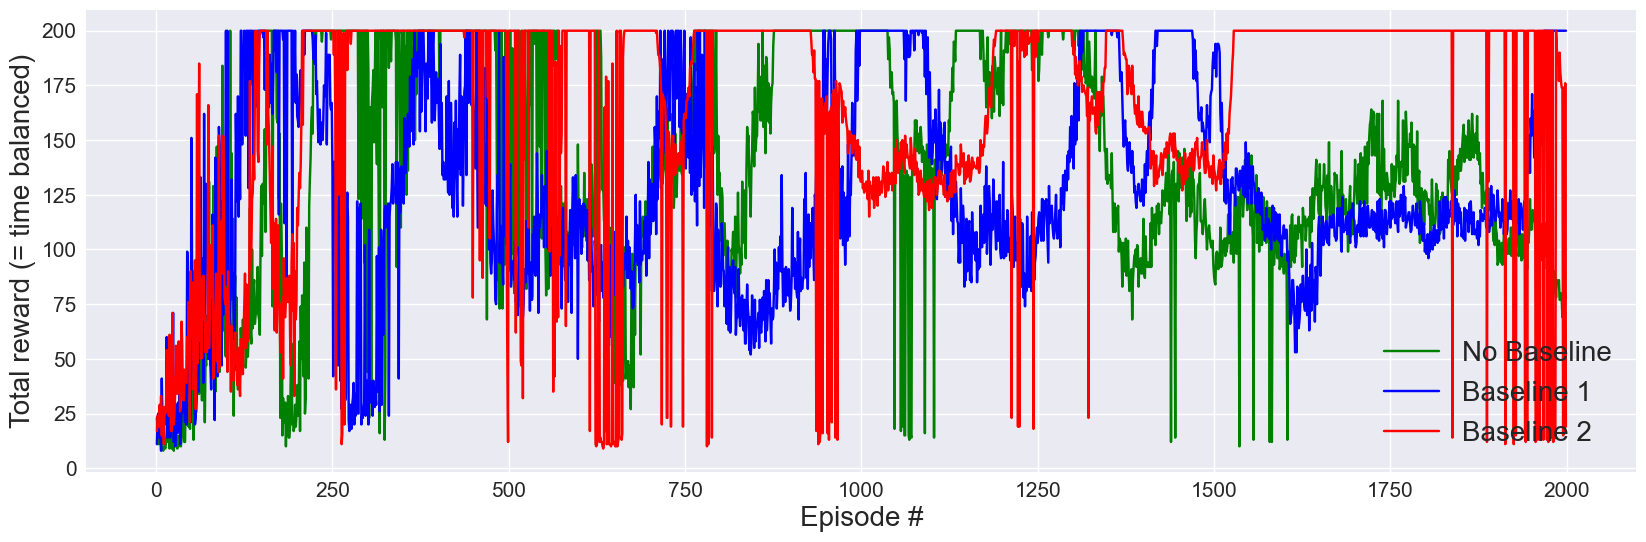

In [60]:
### Plot the learning progress

# Create the plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

# Plot the scores with specified colors and labels
ax.plot(np.arange(1, len(scores_rwd2go) + 1), scores_rwd2go, color='green', label='No Baseline')
ax.plot(np.arange(1, len(scores_baseline_1) + 1), scores_baseline_1, color='blue', label='Baseline 1')
ax.plot(np.arange(1, len(scores_baseline_2) + 1), scores_baseline_2, color='red', label='Baseline 2')

# Set the labels with a larger font size
ax.set_ylabel('Total reward (= time balanced)', fontsize=20)
ax.set_xlabel('Episode #', fontsize=20)

# Set the tick labels to a larger font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend with a specified font size
ax.legend(fontsize=20)

# Show the plot
plt.show()

# $Q^\star$: Policy Gradient with continuous actions and bound on the bonuses count in OPPO (20 points)
***Question 1:*** Consider using a Gaussian parameterized policy $\pi_{\mu,\Sigma}$ with mean $\mu \in \mathrm{R}^d$ 
and covariance matrix $\Sigma$ . Write down the following gradients:

$$ \nabla_\mu J(\pi_{\mu, \Sigma}) = ???$$
$$ \nabla_\Sigma J(\pi_{\mu, \Sigma}) = ???$$
***Question 2*** In this exercise, you will bound the state action counts. This is a crucial part of the OPPO convergence proof. Let $N^t_h(s,a)$ denotes the number of times the state action pair $s,a$ has been visited at step $h$ in all the episode up to $t$ included. Moreover,
let $s^t_h,a^t_h$ be the state action pair visited at step $h$ of the $t^{th}$ episode. Then, prove that 
$$ \sum^T_{t=1} \sum^H_{h=1} \frac{1}{N^t_h(s^t_h, a^t_h)+1} \leq SA \log( T H)$$
***Question 3*** Use the fact above to prove the following bound at slide 30 of Lecture 5. That is, for $\mathrm{bonus}^t_h(s,a) = \frac{H}{\sqrt{N^t_h(s,a)}}$ it holds that
$$ \sum^T_{t=1} \sum^H_{h=1} \mathrm{bonus}(s^t_h, a^t_h) \leq \sqrt{ H^3 SA T \log( T H)}$$

>**Answer 1:**

 - Let's remind the expression of a Gaussian parameterized policy $\pi_{\mu, \Sigma}$:
$$
\pi_{\mu, \Sigma} (a|s) = \frac{1}{(2\pi)^{d/2} \sqrt{\det \Sigma}} \exp \left[ -\frac{1}{2} (a-\mu)^\top \Sigma^{-1} (a-\mu)   \right]
$$
Later, we will need to compute the gradients of its logarithm:
$$
\log(\pi_{\mu, \Sigma} (a|s)) = -\frac{d}{2} \log(2\pi) -\frac{1}{2}\log(\det (\Sigma))  -\frac{1}{2} (a-\mu)^\top \Sigma^{-1} (a-\mu)  
$$

 - We can use the policy gradient theorem used in REINFORCE (Lecture 4, slide 16):
$$
\nabla_\theta J(\pi_\theta) = \mathbb{E}_{\tau \sim p_\theta} \left[ R(\tau) \sum_{t=0}^{+\infty} \nabla_\theta   \log \pi_\theta (a_t |s_t)  \right]
$$
 - Differentiating the log-policy with respect to $\mu$ is equivalent to take the gradient of a quadratic form:
$$
\nabla_\mu \log(\pi_{\mu, \Sigma} (a|s)) = \Sigma^{-1}(a-\mu)
$$
Resulting in:
$$
\nabla_\mu J(\pi_{\mu, \Sigma}) = \mathbb{E}_{\tau \sim p_{\mu, \Sigma}} \left[ R(\tau) \sum_{t=0}^{+\infty} \Sigma^{-1}(a_t-\mu) \right]
$$
(There is probably an issue with the gaussian parameterization, the infinite sum may not be defined properly)

 - Knowing that $\nabla_\Sigma \log \det \Sigma = \Sigma^{-1}$, and $\nabla_M \left[ u^\top M u  \right] = uu^\top$, and $\nabla_\Sigma (\Sigma^{-1}) = -\Sigma^{-2}$, we can differentiate the log-policy with respect to $\Sigma$:
$$
\nabla_\Sigma \log(\pi_{\mu, \Sigma} (a|s)) = \frac{1}{2} \left( (a-\mu)(a - \mu)^\top \, \Sigma^{-2} - \Sigma^{-1} \right)
$$

Resulting in:
$$
\nabla_\Sigma J(\pi_{\mu, \Sigma}) = \frac{1}{2} \mathbb{E}_{\tau \sim p_{\mu, \Sigma}} \left[ R(\tau) \sum_{t=0}^{+\infty} \left( (a_t-\mu)(a_t - \mu)^\top \, \Sigma^{-2} - \Sigma^{-1} \right)\right]
$$

---

>**Answer 2:**

In this question, we consider the following sum:
$$
\sum_{t=1}^T \sum_{h=1}^H \frac{1}{1+N_h^t(s_h^t, a_h^t)}
$$

The set of indices $I = \{ (t,h) \in \mathbb{N} \; : \; 1\leq t \leq T, 1 \leq h \leq H\}$ can be partitioned with report to the possible state-action pairs:
$$
I = \bigcup_{s,a \in \mathcal{S}\times \mathcal{A}} \{ (t,h) \in I \; :\;  s_h^t, a_h^t = s,a \} = \bigcup_{s,a \in \mathcal{S}\times \mathcal{A}}I(s,a)
$$

Then we can rearrange the sum as follows:
$$
\sum_{t=1}^T \sum_{h=1}^H \frac{1}{1+N_h^t(s_h^t, a_h^t)} = \sum_{s,a \in \mathcal{S}\times \mathcal{A}} \; \sum_{ (t,h) \in I(s,a)} \frac{1}{1+N_h^t(s, a)}
$$
We can reorder the indices in $I(s,a)$ with the chronological order of the visits of $s,a$:
$$
I(s,a) = \{(t_1,h_1), \cdots, (t_{N(s,a)}, h_{N(s,a)}) \}, \quad \text{such that} \quad N_{h_i}^{t_i}(s,a) = i,\, \; \forall i\in \{1,\cdots, N(s,a)\}
$$
Then the sum can have a much simpler expression:
$$
\sum_{s,a \in \mathcal{S}\times \mathcal{A}} \; \sum_{ (t,h) \in I(s,a)} \frac{1}{1+N_h^t(s, a)} = \sum_{s,a \in \mathcal{S}\times \mathcal{A}} \; \sum_{i=1}^{N(s,a)} \frac{1}{1+i}
$$
Using integrals, we know that:
$$
\frac{1}{i+1} \leq \int_i^{i+1} \frac{1}{t} \text{d}t, \quad \forall i \geq 1
$$
$$
\Rightarrow \quad \sum_{i=1}^{N(s,a)} \frac{1}{1+i} \leq \int_1^{1+N(s,a) }\frac{1}{t} \text{d}t = \log(1+N(s,a))
$$
Using that $1+N(s,a) \leq \mathcal{O}(TH)$ (since we cannot visit a state-action pair more than TH times, as it is the total amount of visits), we can conclude:
$$
\sum_{s,a \in \mathcal{S}\times \mathcal{A}} \; \sum_{i=1}^{N(s,a)} \frac{1}{1+i} \leq \sum_{s,a \in \mathcal{S}\times \mathcal{A}} \mathcal{O}(\log(TH)) = \mathcal{O}(SA\log(TH))
$$
Which is equivalent to:
$$
\sum_{t=1}^T \sum_{h=1}^H \frac{1}{1+N_h^t(s_h^t, a_h^t)} \leq \mathcal{O}(\log(TH)) = \mathcal{O}(SA\log(TH))
$$

---

>**Answer 3:**

Now, we consider the following sum:
$$
\sum_{t=1}^T \sum_{h=1}^H \text{bonus}_h^t(s_h^t, a_h^t) = \sum_{t=1}^T \sum_{h=1}^H \frac{H}{\sqrt{N_h^t(s_h^t,a_h^t)}}
$$
This sum can be considered as an inner product between $x = \left(\frac{1}{\sqrt{N_h^t(s_h^t,a_h^t)}}\right)_{t,h}$ and $y = H \mathbf{1} \in \mathbb{R}^{HT}$. Then we can apply Cauchy-Schwarz inequality:
$$
\sum_{t=1}^T \sum_{h=1}^H \frac{H}{\sqrt{N_h^t(s_h^t,a_h^t)}} \leq \sqrt{\sum_{t=1}^T \sum_{h=1}^H \frac{1}{N_h^t(s_h^t,a_h^t)}} \cdot \sqrt{\sum_{t=1}^T \sum_{h=1}^H H^2}
$$
$$
(\star)\quad \leq \sqrt{\sum_{t=1}^T \sum_{h=1}^H \frac{1}{N_h^t(s_h^t,a_h^t)}} \cdot \sqrt{TH^3}
$$

Since $\forall x \geq 1, \, \frac{1}{x} \leq \frac{2}{x+1}$,
$$
\sum_{t=1}^T \sum_{h=1}^H \frac{1}{N_h^t(s_h^t,a_h^t)} \leq 2 \cdot \sum_{t=1}^T \sum_{h=1}^H \frac{1}{N_h^t(s_h^t,a_h^t)+1}
$$
We can use the result from the previous question:
$$
\quad \sum_{t=1}^T \sum_{h=1}^H \frac{1}{N_h^t(s_h^t,a_h^t)} \leq \mathcal{O}(SA\log(TH))
$$
Then we can use the fact that $\sqrt{x}$ is nondecreasing in $(\star)$, resulting in the desired inequality:
$$
\sum_{t=1}^T \sum_{h=1}^H \text{bonus}_h^t(s_h^t, a_h^t) \leq \mathcal{O}\left(\sqrt{ H^3 SAT\log(TH)   }\right)
$$

---